<a href="https://colab.research.google.com/github/sriram403/RegressionProject/blob/main/REGRESSION_MY_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction the house value with given information :)

SO Said that ... we got the data
lets change the data columns into real date values

In [1]:
import pandas as pd
from datetime import datetime
parser = lambda x:datetime.strptime(x,'%d-%M-%Y')#this parser is optional we can use this for complex date and time
df = pd.read_csv("/content/drive/MyDrive/Datasets/Chennai houseing sale.csv",parse_dates=["DATE_SALE","DATE_BUILD"],date_parser=parser)
df.head(1).T

0
PRT_ID                      P03210
AREA                    Karapakkam
INT_SQFT                      1004
DATE_SALE      2011-01-04 00:05:00
DIST_MAINROAD                  131
N_BEDROOM                      1.0
N_BATHROOM                     1.0
N_ROOM                           3
SALE_COND                 AbNormal
PARK_FACIL                     Yes
DATE_BUILD     1967-01-15 00:05:00
BUILDTYPE               Commercial
UTILITY_AVAIL               AllPub
STREET                       Paved
MZZONE                           A
QS_ROOMS                       4.0
QS_BATHROOM                    3.9
QS_BEDROOM                     4.9
QS_OVERALL                    4.33
REG_FEE                     380000
COMMIS                      144400
SALES_PRICE                7600000

##Before Changing anything lets copy the original data so we can manipulate the fake data 

In [2]:
t_df = df.copy()
t_df.dropna(inplace=True)

##Cleaning the Data 

In [3]:
#Droping Any NULL Values In Our DataFrame
t_df.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [4]:
t_df.DATE_SALE.dtype

dtype('<M8[ns]')

In [5]:
t_df.head(3).T

0                    1                    2
PRT_ID                      P03210               P09411               P01812
AREA                    Karapakkam           Anna Nagar                Adyar
INT_SQFT                      1004                 1986                  909
DATE_SALE      2011-01-04 00:05:00  2006-01-19 00:12:00  2012-01-04 00:02:00
DIST_MAINROAD                  131                   26                   70
N_BEDROOM                      1.0                  2.0                  1.0
N_BATHROOM                     1.0                  1.0                  1.0
N_ROOM                           3                    5                    3
SALE_COND                 AbNormal             AbNormal             AbNormal
PARK_FACIL                     Yes                   No                  Yes
DATE_BUILD     1967-01-15 00:05:00  1995-01-22 00:12:00  1992-01-09 00:02:00
BUILDTYPE               Commercial           Commercial           Commercial
UTILITY_AVAIL               AllPub               AllPub                  ELO
STREET                       Paved               Gravel               Gravel
MZZONE                           A                   RH                   RL
QS_ROOMS                       4.0                  4.9                  4.1
QS_BATHROOM                    3.9                  4.2                  3.8
QS_BEDROOM                     4.9                  2.5                  2.2
QS_OVERALL                    4.33                3.765                 3.09
REG_FEE                     380000               760122               421094
COMMIS                      144400               304049                92114
SALES_PRICE                7600000             21717770             13159200

###So lets change the columns informations

In [6]:
# lets rechange the index values  
t_df.columns = t_df.columns.str.lower()
t_df=t_df.reindex(columns=["prt_id","area","int_sqft","dist_mainroad","n_bedroom","n_bathroom","n_room","buildtype","utility_avail",
                           "street","qs_rooms","park_facil","mzzone",
                            "qs_bathroom","qs_bedroom","qs_overall","commis","reg_fee","date_sale","date_build","sale_cond","sales_price"])
t_df.head().T

0                    1                    2  \
prt_id                      P03210               P09411               P01812   
area                    Karapakkam           Anna Nagar                Adyar   
int_sqft                      1004                 1986                  909   
dist_mainroad                  131                   26                   70   
n_bedroom                      1.0                  2.0                  1.0   
n_bathroom                     1.0                  1.0                  1.0   
n_room                           3                    5                    3   
buildtype               Commercial           Commercial           Commercial   
utility_avail               AllPub               AllPub                  ELO   
street                       Paved               Gravel               Gravel   
qs_rooms                       4.0                  4.9                  4.1   
park_facil                     Yes                   No                  Yes   
mzzone                           A                   RH                   RL   
qs_bathroom                    3.9                  4.2                  3.8   
qs_bedroom                     4.9                  2.5                  2.2   
qs_overall                    4.33                3.765                 3.09   
commis                      144400               304049                92114   
reg_fee                     380000               760122               421094   
date_sale      2011-01-04 00:05:00  2006-01-19 00:12:00  2012-01-04 00:02:00   
date_build     1967-01-15 00:05:00  1995-01-22 00:12:00  1992-01-09 00:02:00   
sale_cond                 AbNormal             AbNormal             AbNormal   
sales_price                7600000             21717770             13159200   

                                 3                    4  
prt_id                      P05346               P06210  
area                     Velachery           Karapakkam  
int_sqft                      1855                 1226  
dist_mainroad                   14                   84  
n_bedroom                      3.0                  1.0  
n_bathroom                     2.0                  1.0  
n_room                           5                    3  
buildtype                   Others               Others  
utility_avail              NoSewr                AllPub  
street                       Paved               Gravel  
qs_rooms                       4.7                  3.0  
park_facil                      No                  Yes  
mzzone                           I                    C  
qs_bathroom                    3.9                  2.5  
qs_bedroom                     3.6                  4.1  
qs_overall                    4.01                 3.29  
commis                       77042                74063  
reg_fee                     356321               237000  
date_sale      2010-01-13 00:03:00  2009-01-05 00:10:00  
date_build     1988-01-18 00:03:00  1979-01-13 00:10:00  
sale_cond                   Family             AbNormal  
sales_price                9630290              7406250

In [7]:
t_df.utility_avail.value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: utility_avail, dtype: int64

In [8]:
t_df.date_sale.dtype

dtype('<M8[ns]')

In [9]:
t_df.area.value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

In [10]:
t_df.area = t_df.area.replace({"Chrmpet":"Chrompet",
                   "Chrompt":"Chrompet",
                   "Chormpet":"Chrompet",
                   "KKNagar":"KK Nagar",
                   "Velchery":"Velachery",
                   "Ana Nagar":"Anna Nagar",
                   "Ann Nagar":"Anna Nagar",
                   "Adyr":"Adyar",
                   "Karapakam":"Karapakkam",
                   "TNagar":"T Nagar"})
t_df.area.value_counts()

Chrompet      1691
Karapakkam    1359
KK Nagar       990
Velachery      975
Anna Nagar     777
Adyar          769
T Nagar        495
Name: area, dtype: int64

In [11]:
t_df.utility_avail.value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: utility_avail, dtype: int64

In [12]:
t_df.utility_avail = t_df.utility_avail.replace({"All Pub":"AllPub"})
t_df.utility_avail.value_counts()

AllPub     1875
NoSeWa     1860
NoSewr     1812
ELO        1509
Name: utility_avail, dtype: int64

In [13]:
t_df.sale_cond = t_df.sale_cond.str.lower()
t_df.sale_cond.value_counts()

adjland        1426
normal sale    1416
partial        1414
abnormal       1396
family         1390
adj land          6
ab normal         5
partiall          3
Name: sale_cond, dtype: int64

In [14]:
t_df.sale_cond = t_df.sale_cond.replace({"adj land":"adjland",
                                         "ab normal":"abnormal",
                                         "partiall":"partial"})
t_df.sale_cond.value_counts()

adjland        1432
partial        1417
normal sale    1416
abnormal       1401
family         1390
Name: sale_cond, dtype: int64

In [15]:
t_df.street.value_counts()
t_df.street = t_df.street.replace({"Pavd":"Paved",
                                   "NoAccess":"No Access"})
t_df.street.value_counts()

Paved        2554
Gravel       2502
No Access    2000
Name: street, dtype: int64

###Changing the upper case to lower case

In [16]:
t_df = t_df.astype(str).apply(lambda x: x.str.lower())# by using this function we are changing the datetime into object which is string just to remember :0

In [17]:
t_df.date_sale.dtype

dtype('O')

In [18]:
t_df.head(1).T

0
prt_id                      p03210
area                    karapakkam
int_sqft                      1004
dist_mainroad                  131
n_bedroom                      1.0
n_bathroom                     1.0
n_room                           3
buildtype               commercial
utility_avail               allpub
street                       paved
qs_rooms                       4.0
park_facil                     yes
mzzone                           a
qs_bathroom                    3.9
qs_bedroom                     4.9
qs_overall                    4.33
commis                      144400
reg_fee                     380000
date_sale      2011-01-04 00:05:00
date_build     1967-01-15 00:05:00
sale_cond                 abnormal
sales_price                7600000

In [19]:
t_df.street.value_counts()

paved        2554
gravel       2502
no access    2000
Name: street, dtype: int64

In [20]:
t_df.buildtype.value_counts()

house         2433
commercial    2307
others        2287
other           25
comercial        4
Name: buildtype, dtype: int64

In [21]:
t_df.buildtype = t_df.buildtype.replace({"other":"others",
                                         "comercial":"commercial"})
t_df.buildtype.value_counts()

house         2433
others        2312
commercial    2311
Name: buildtype, dtype: int64

In [22]:
t_df.area.value_counts()

chrompet      1691
karapakkam    1359
kk nagar       990
velachery      975
anna nagar     777
adyar          769
t nagar        495
Name: area, dtype: int64

In [23]:
t_df.prt_id.value_counts()

p03210    1
p07534    1
p06158    1
p01307    1
p09516    1
         ..
p04550    1
p04710    1
p06791    1
p09761    1
p09794    1
Name: prt_id, Length: 7056, dtype: int64

In [24]:
t_df.int_sqft.dtype

dtype('O')

In [25]:
def change_dtype(columns):
  for column in columns:
    t_df[column] = t_df[column].astype(float).astype(int)

In [26]:
columns = ["int_sqft","dist_mainroad","n_bedroom","n_bathroom","n_room","qs_rooms","qs_bathroom","qs_bedroom","qs_overall","commis","reg_fee","sales_price"]
change_dtype(columns)

In [27]:
t_df.head(3).T

0                    1                    2
prt_id                      p03210               p09411               p01812
area                    karapakkam           anna nagar                adyar
int_sqft                      1004                 1986                  909
dist_mainroad                  131                   26                   70
n_bedroom                        1                    2                    1
n_bathroom                       1                    1                    1
n_room                           3                    5                    3
buildtype               commercial           commercial           commercial
utility_avail               allpub               allpub                  elo
street                       paved               gravel               gravel
qs_rooms                         4                    4                    4
park_facil                     yes                   no                  yes
mzzone                           a                   rh                   rl
qs_bathroom                      3                    4                    3
qs_bedroom                       4                    2                    2
qs_overall                       4                    3                    3
commis                      144400               304049                92114
reg_fee                     380000               760122               421094
date_sale      2011-01-04 00:05:00  2006-01-19 00:12:00  2012-01-04 00:02:00
date_build     1967-01-15 00:05:00  1995-01-22 00:12:00  1992-01-09 00:02:00
sale_cond                 abnormal             abnormal             abnormal
sales_price                7600000             21717770             13159200

##Visualize the data

In [28]:
import seaborn as sb

In [29]:
import matplotlib.pyplot as plt

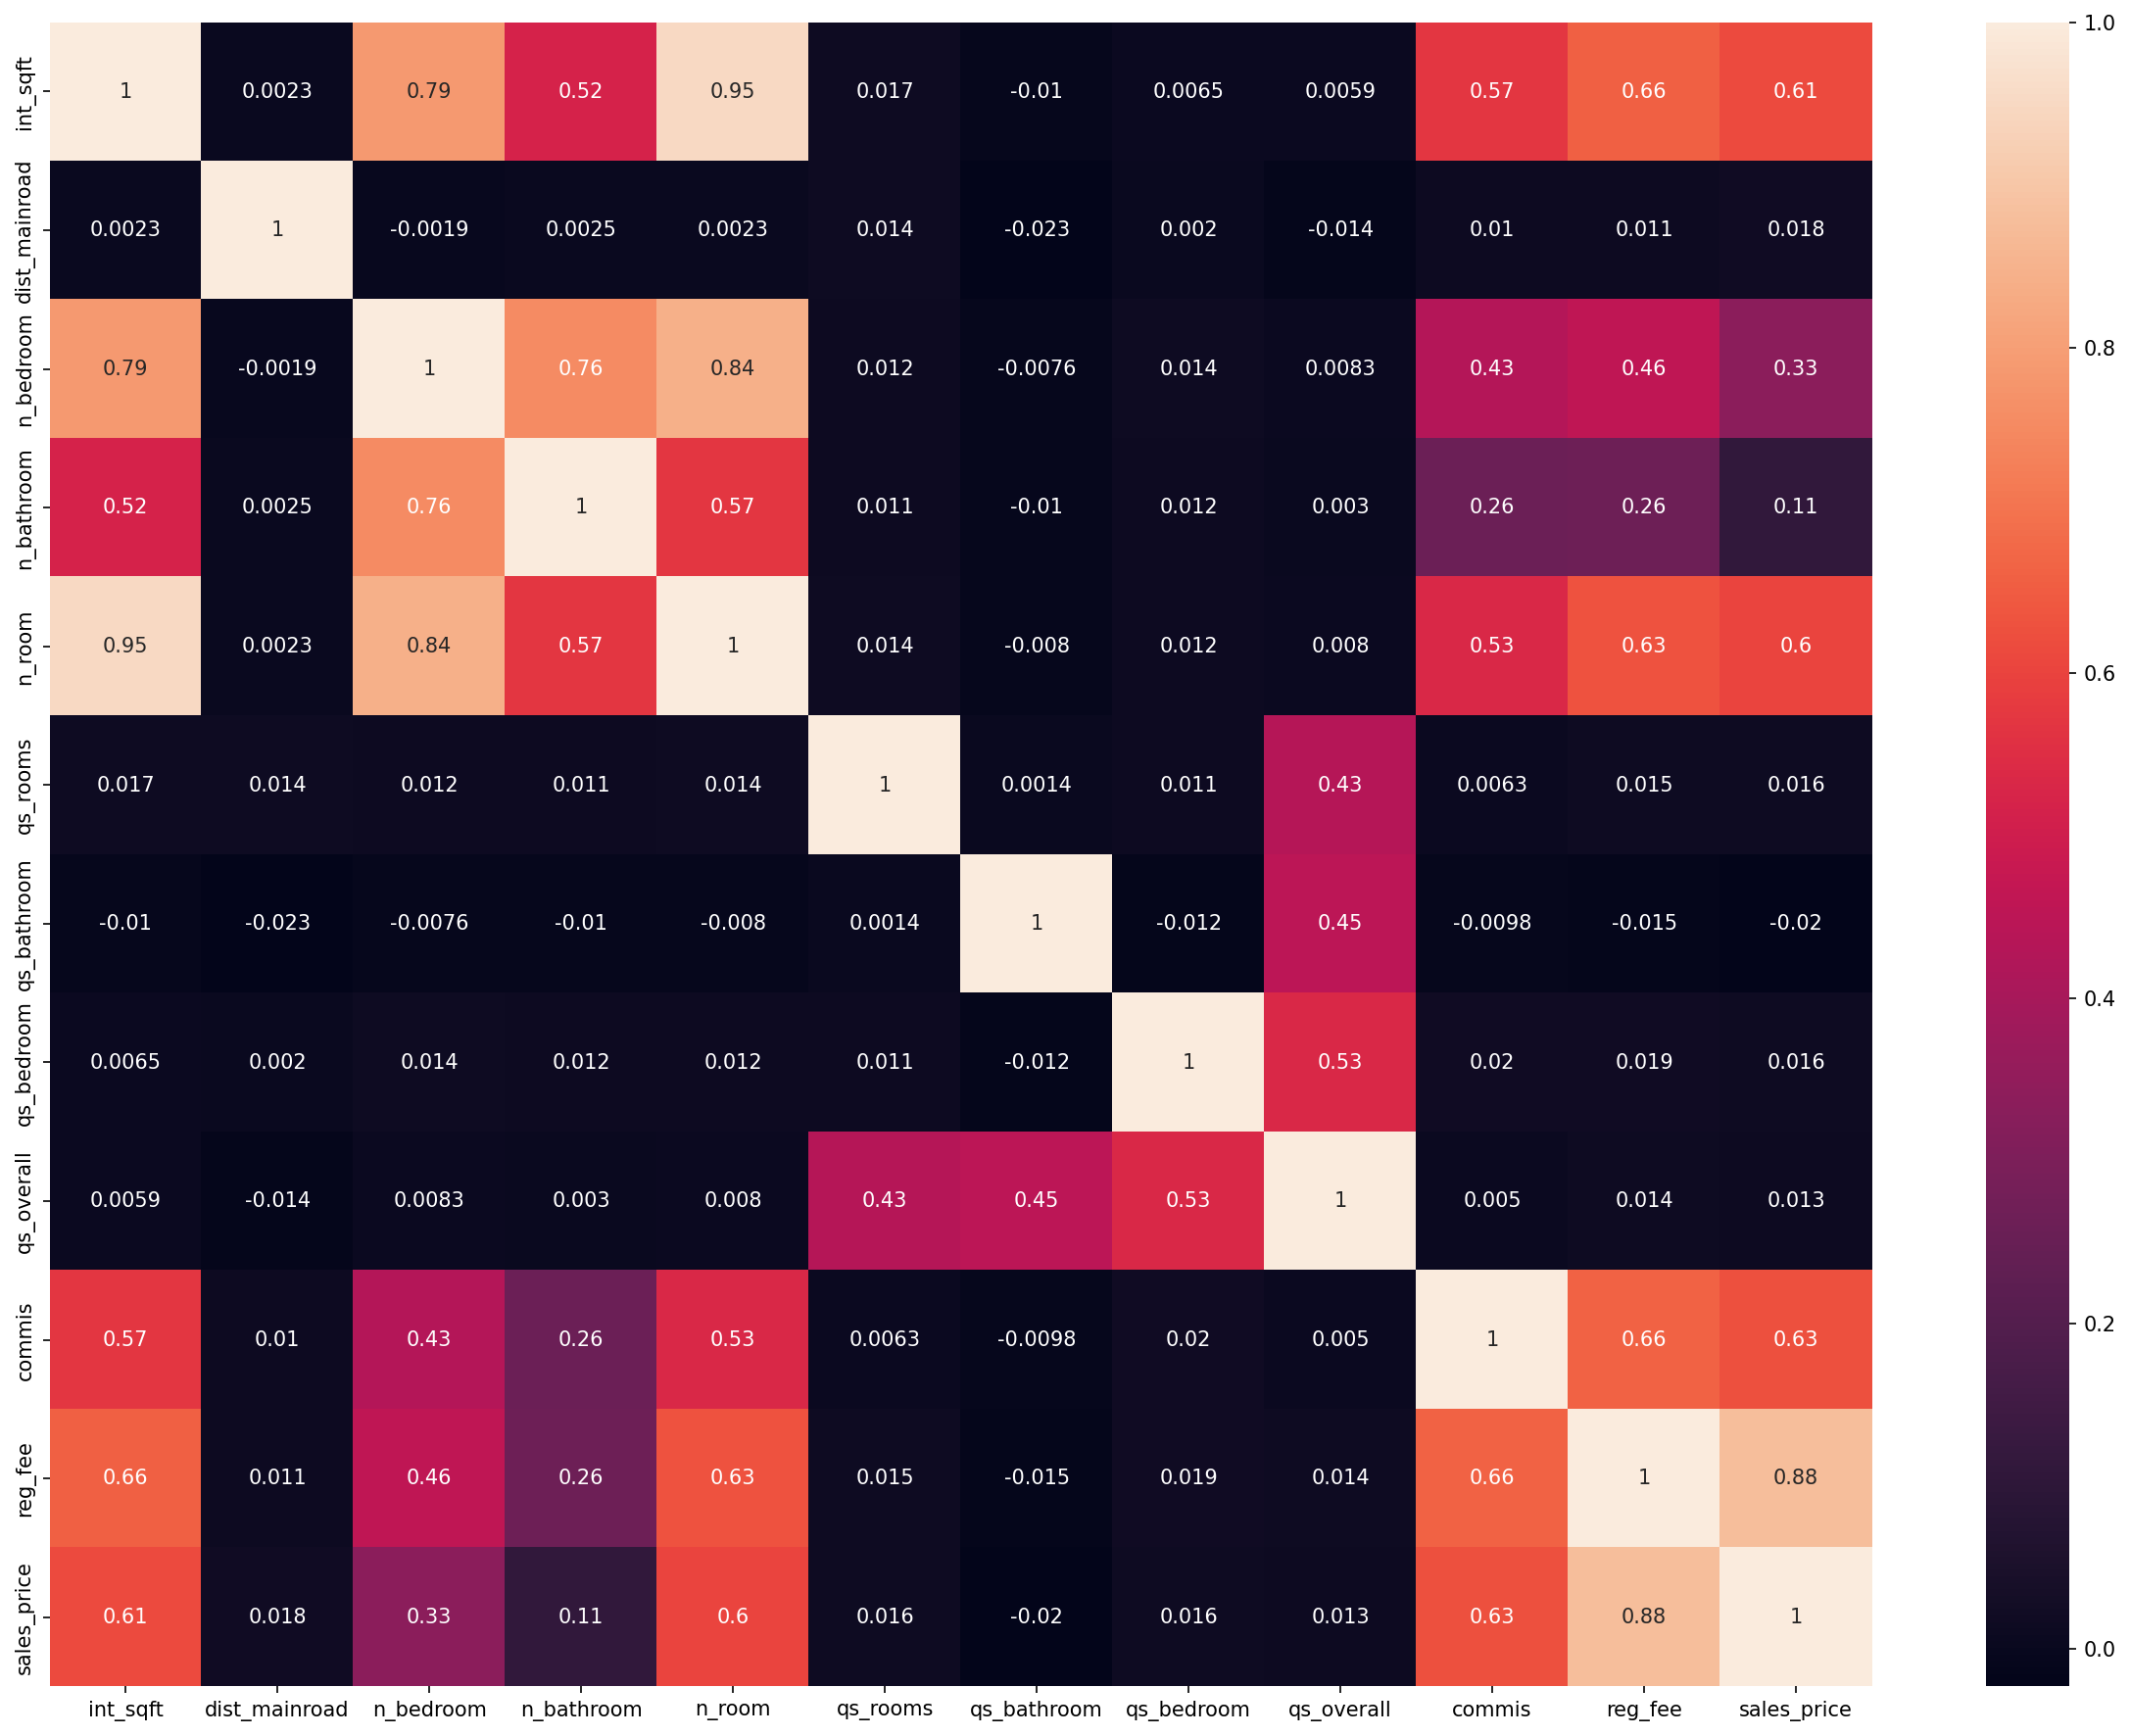

In [30]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15),dpi=150)
svm = sb.heatmap(t_df.corr(),annot=True)
# svm.figure.savefig("seabornHeatmap.png",dpi=400)

In [32]:
t_df.head(3).T

0                    1                    2
prt_id                      p03210               p09411               p01812
area                    karapakkam           anna nagar                adyar
int_sqft                      1004                 1986                  909
dist_mainroad                  131                   26                   70
n_bedroom                        1                    2                    1
n_bathroom                       1                    1                    1
n_room                           3                    5                    3
buildtype               commercial           commercial           commercial
utility_avail               allpub               allpub                  elo
street                       paved               gravel               gravel
qs_rooms                         4                    4                    4
park_facil                     yes                   no                  yes
mzzone                           a                   rh                   rl
qs_bathroom                      3                    4                    3
qs_bedroom                       4                    2                    2
qs_overall                       4                    3                    3
commis                      144400               304049                92114
reg_fee                     380000               760122               421094
date_sale      2011-01-04 00:05:00  2006-01-19 00:12:00  2012-01-04 00:02:00
date_build     1967-01-15 00:05:00  1995-01-22 00:12:00  1992-01-09 00:02:00
sale_cond                 abnormal             abnormal             abnormal
sales_price                7600000             21717770             13159200

###just plotting the categorical values 

In [33]:
fig = plt.figure(figsize=(30,25),dpi=500)

plt.subplot(5,2,1)
sb.histplot(t_df.utility_avail,kde=True)

plt.subplot(5,2,2)
sb.histplot(t_df.area,linewidth=0,kde=True)

plt.subplot(5,2,3)
sb.histplot(t_df.sale_cond,kde=True)

plt.subplot(5,2,4)
sb.histplot(t_df.street,kde=True)

plt.subplot(5,2,5)
sb.histplot(t_df.buildtype,kde=True)

# fig.savefig("categorical Values.png")

**Its got the bell curve which is also called normalized distribution**

###lets plot the numerical values 

In [34]:
t_df.head(1).T

0
prt_id                      p03210
area                    karapakkam
int_sqft                      1004
dist_mainroad                  131
n_bedroom                        1
n_bathroom                       1
n_room                           3
buildtype               commercial
utility_avail               allpub
street                       paved
qs_rooms                         4
park_facil                     yes
mzzone                           a
qs_bathroom                      3
qs_bedroom                       4
qs_overall                       4
commis                      144400
reg_fee                     380000
date_sale      2011-01-04 00:05:00
date_build     1967-01-15 00:05:00
sale_cond                 abnormal
sales_price                7600000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

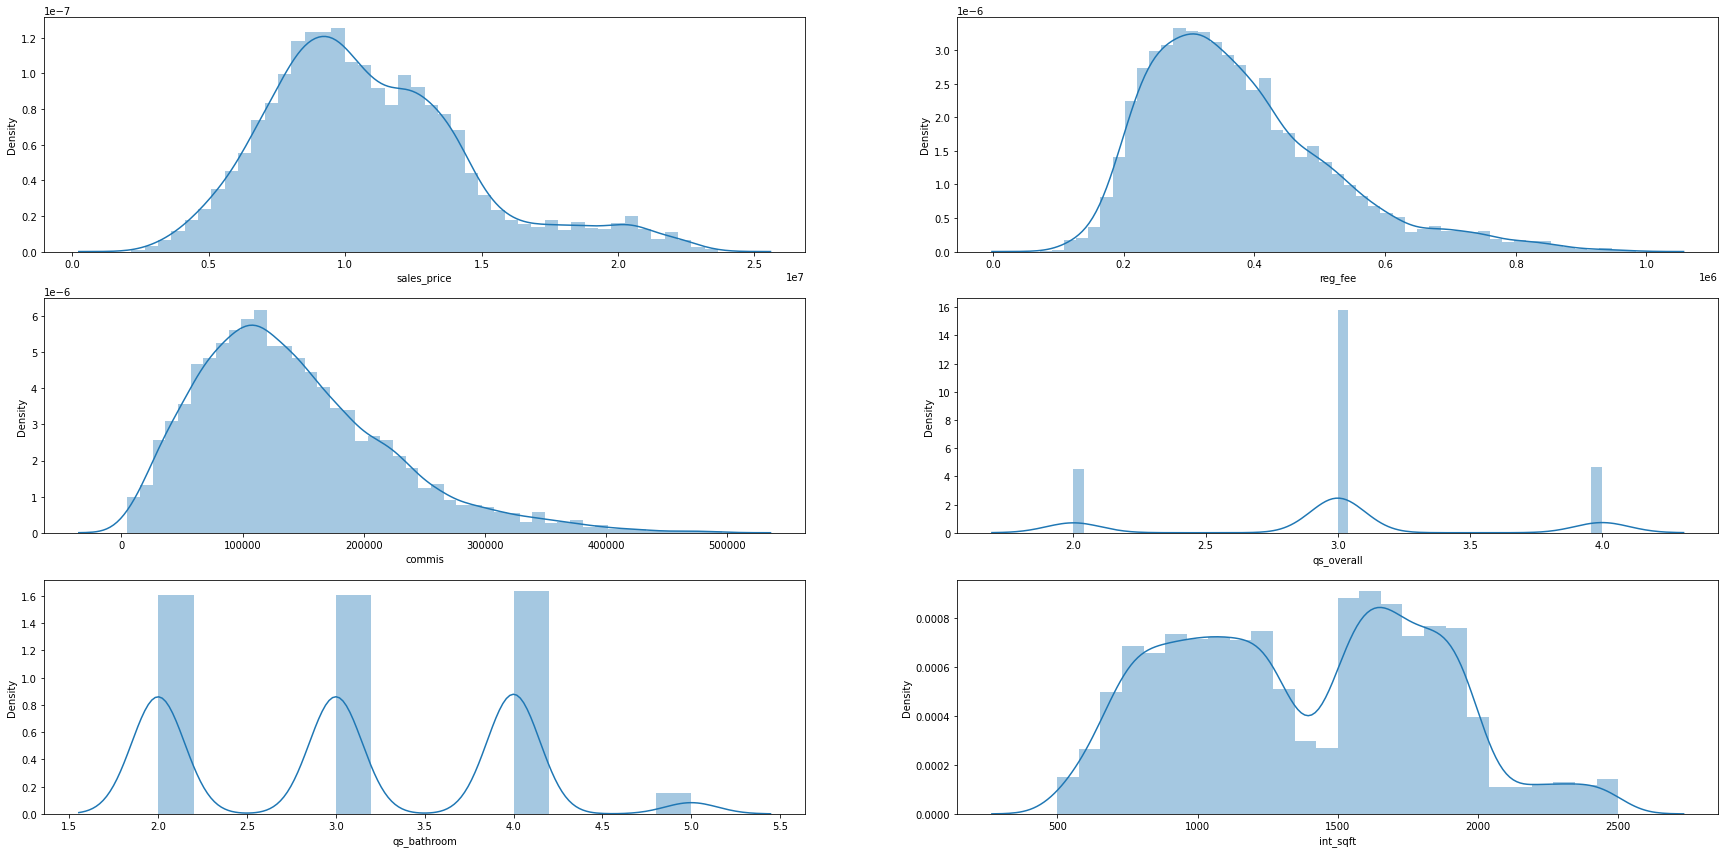

In [35]:
plt.figure(figsize=(30,25))

plt.subplot(5,2,1)
sb.distplot(t_df.sales_price)

plt.subplot(5,2,2)
sb.distplot(t_df.reg_fee)

plt.subplot(5,2,3)
sb.distplot(t_df.commis)

plt.subplot(5,2,4)
sb.distplot(t_df.qs_overall)

plt.subplot(5,2,5)
sb.distplot(t_df.qs_bathroom)

plt.subplot(5,2,6)
sb.distplot(t_df.int_sqft)

#and soo onn.... 

In [36]:
#lets create a function to do this plot 
def plot_all_numeric_values(columns):
  for i,column in enumerate(columns):
    plt.subplot(15,2,i+1)
    sb.distplot(t_df[column])
    print(f"the {i+1} is = {column}")

In [37]:
columns = ["int_sqft","dist_mainroad","n_bedroom","n_bathroom","n_room","qs_rooms","qs_bathroom","qs_bedroom","qs_overall","commis","reg_fee","sales_price"]

In [38]:
fig = plt.figure(figsize=(30,30),dpi=500)
plot_all_numeric_values(columns)
# fig.savefig("all_numeric_values.png")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


the 1 is = int_sqft
the 2 is = dist_mainroad


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


the 3 is = n_bedroom
the 4 is = n_bathroom


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


the 5 is = n_room
the 6 is = qs_rooms


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


the 7 is = qs_bathroom
the 8 is = qs_bedroom


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


the 9 is = qs_overall


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


the 10 is = commis
the 11 is = reg_fee


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


the 12 is = sales_price


###lets plot continous Numerical values 

In [39]:
t_df.head(1).T

0
prt_id                      p03210
area                    karapakkam
int_sqft                      1004
dist_mainroad                  131
n_bedroom                        1
n_bathroom                       1
n_room                           3
buildtype               commercial
utility_avail               allpub
street                       paved
qs_rooms                         4
park_facil                     yes
mzzone                           a
qs_bathroom                      3
qs_bedroom                       4
qs_overall                       4
commis                      144400
reg_fee                     380000
date_sale      2011-01-04 00:05:00
date_build     1967-01-15 00:05:00
sale_cond                 abnormal
sales_price                7600000

In [40]:
t_df.n_bedroom.dtype

dtype('int64')

####Creating a function to change dtype 

In [41]:
def change_to_int(columns):
  for i,column in enumerate(columns):
   
    t_df[column] = t_df[column].astype(float).astype(int)#just changing int is causing problem becoz of float values in between in our datas
    print(f"changed the {column} into int")

In [42]:
columns = ["int_sqft","dist_mainroad","n_bedroom","n_bathroom","n_room","qs_rooms","qs_bedroom","qs_bathroom","qs_overall","commis","reg_fee","sales_price"]

In [43]:
change_to_int(columns)
t_df.int_sqft.dtype

changed the int_sqft into int
changed the dist_mainroad into int
changed the n_bedroom into int
changed the n_bathroom into int
changed the n_room into int
changed the qs_rooms into int
changed the qs_bedroom into int
changed the qs_bathroom into int
changed the qs_overall into int
changed the commis into int
changed the reg_fee into int
changed the sales_price into int


dtype('int64')

####Created a function for regplot

In [44]:
def create_regplot(columns,standard_values="sales_price"):
  for i,column in enumerate(columns):
    plt.subplot(10,2,i+1)
    sb.regplot(x = t_df[column],y = t_df[standard_values],scatter_kws={"color":"green"},line_kws={"color":"red"})

####Continous NUmerical values

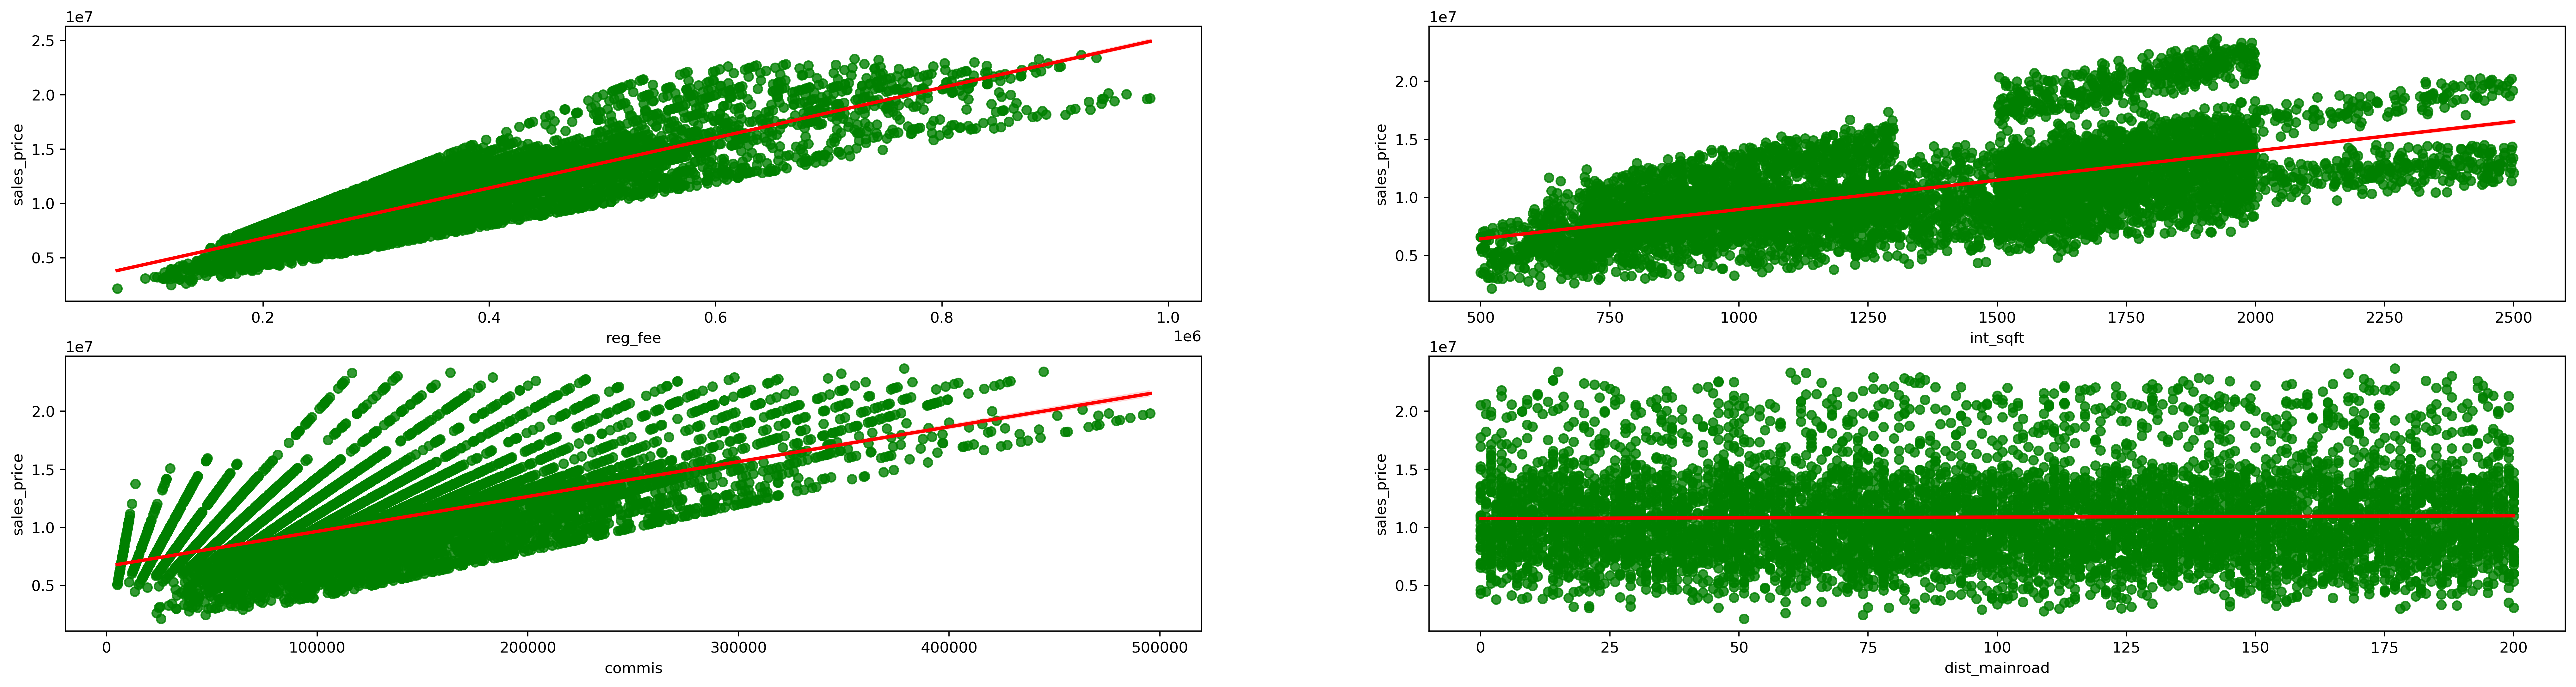

In [45]:
fig = plt.figure(figsize=(30,40),dpi=340)

columns = ["reg_fee","int_sqft","commis","dist_mainroad"]
create_regplot(columns)
# fig.savefig("regplot_numerical_values.png")

###Descrete numerical values

In [46]:
t_df.head(1).T

0
prt_id                      p03210
area                    karapakkam
int_sqft                      1004
dist_mainroad                  131
n_bedroom                        1
n_bathroom                       1
n_room                           3
buildtype               commercial
utility_avail               allpub
street                       paved
qs_rooms                         4
park_facil                     yes
mzzone                           a
qs_bathroom                      3
qs_bedroom                       4
qs_overall                       4
commis                      144400
reg_fee                     380000
date_sale      2011-01-04 00:05:00
date_build     1967-01-15 00:05:00
sale_cond                 abnormal
sales_price                7600000

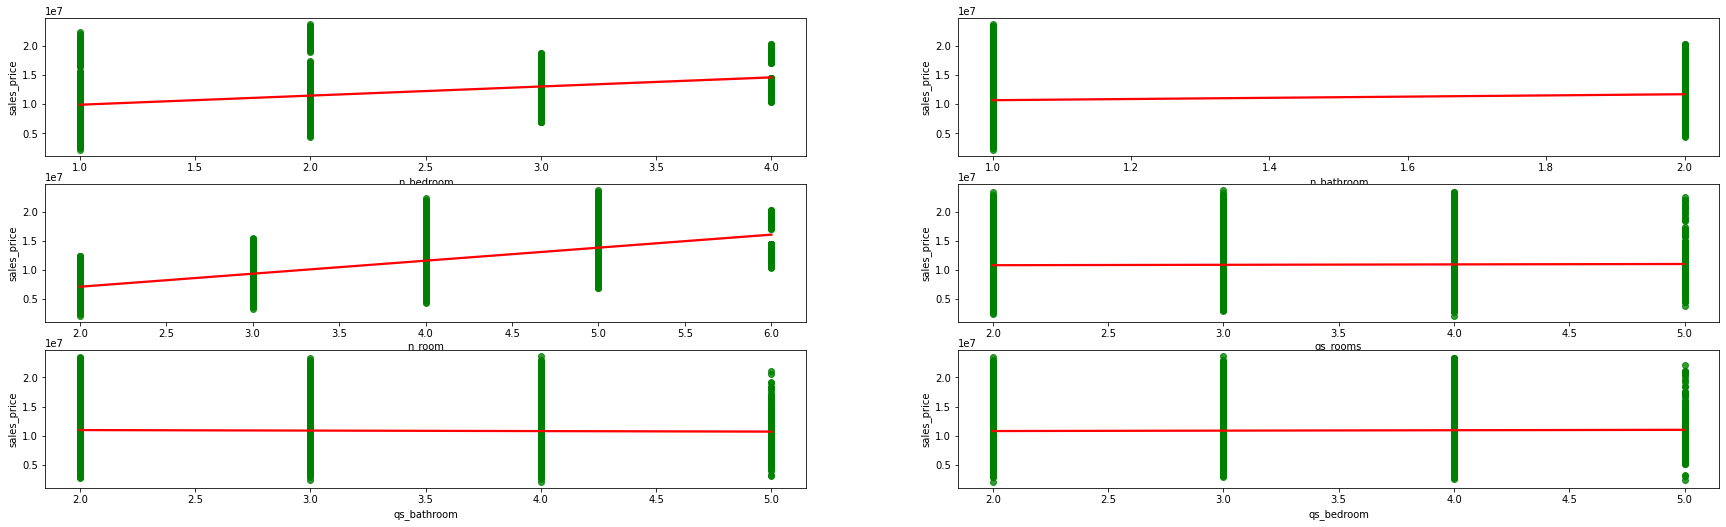

In [47]:
columns = ["n_bedroom","n_bathroom","n_room","qs_rooms","qs_bathroom","qs_bedroom"]
plt.figure(figsize=(30,30))
create_regplot(columns)

###ploting categorical vs salesprices

In [48]:
def plot_cat_vs_sales(columns,s_v = "sales_price"):
  for i,column in enumerate(columns):
    plt.subplot(10,2,i+1)
    sb.barplot(x=t_df[column],y=t_df[s_v],order=t_df.groupby(column)[s_v].mean().reset_index().sort_values('sales_price')[column])#its not clear for me to ... (past sriram:))

  plt.suptitle("categorical Vs SalesPrices",fontsize=20)
  plt.show()

In [49]:
t_df.groupby("area")["sales_price"].mean()

area
adyar         9.180046e+06
anna nagar    1.517138e+07
chrompet      1.000575e+07
karapakkam    7.339913e+06
kk nagar      1.270697e+07
t nagar       1.561969e+07
velachery     1.104807e+07
Name: sales_price, dtype: float64

In [50]:
t_df.head(2).T

0                    1
prt_id                      p03210               p09411
area                    karapakkam           anna nagar
int_sqft                      1004                 1986
dist_mainroad                  131                   26
n_bedroom                        1                    2
n_bathroom                       1                    1
n_room                           3                    5
buildtype               commercial           commercial
utility_avail               allpub               allpub
street                       paved               gravel
qs_rooms                         4                    4
park_facil                     yes                   no
mzzone                           a                   rh
qs_bathroom                      3                    4
qs_bedroom                       4                    2
qs_overall                       4                    3
commis                      144400               304049
reg_fee                     380000               760122
date_sale      2011-01-04 00:05:00  2006-01-19 00:12:00
date_build     1967-01-15 00:05:00  1995-01-22 00:12:00
sale_cond                 abnormal             abnormal
sales_price                7600000             21717770

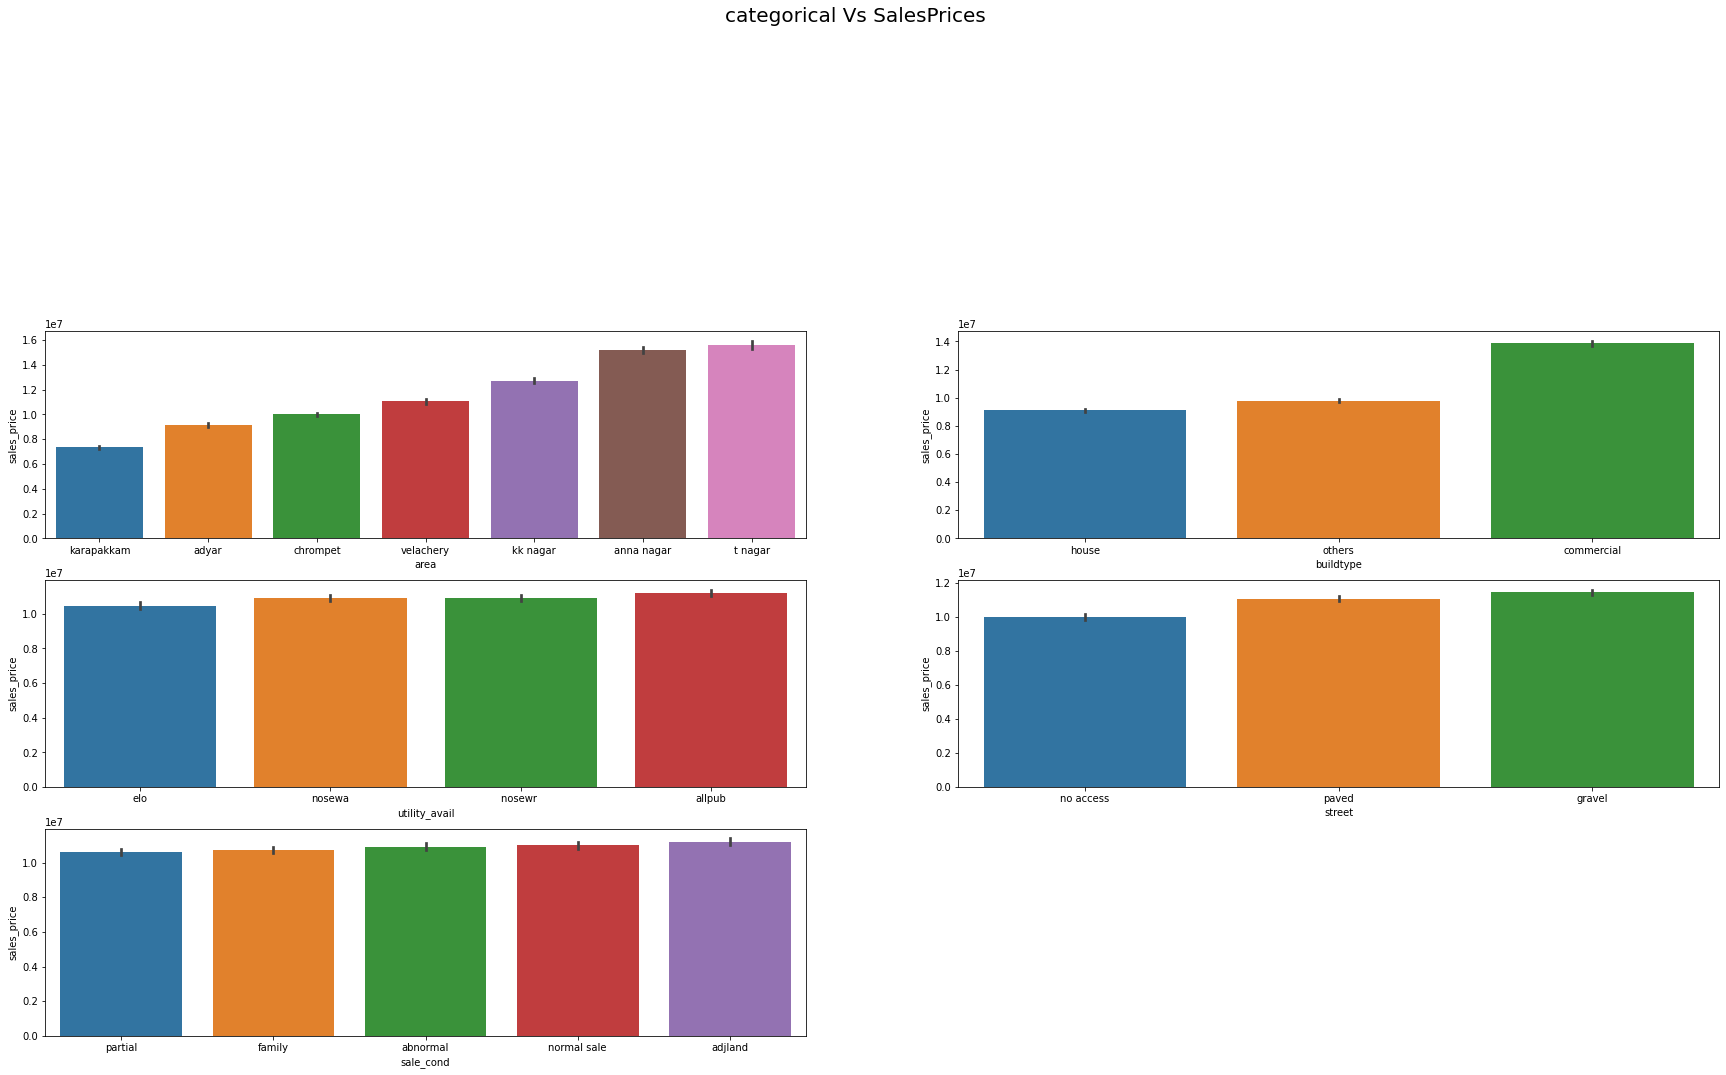

In [51]:
plt.figure(figsize=(30,45))
columns=["area","buildtype","utility_avail","street","sale_cond"]
plot_cat_vs_sales(columns)

In [52]:
t_df.head(1).T

0
prt_id                      p03210
area                    karapakkam
int_sqft                      1004
dist_mainroad                  131
n_bedroom                        1
n_bathroom                       1
n_room                           3
buildtype               commercial
utility_avail               allpub
street                       paved
qs_rooms                         4
park_facil                     yes
mzzone                           a
qs_bathroom                      3
qs_bedroom                       4
qs_overall                       4
commis                      144400
reg_fee                     380000
date_sale      2011-01-04 00:05:00
date_build     1967-01-15 00:05:00
sale_cond                 abnormal
sales_price                7600000

In [53]:
t_df = t_df.reindex(columns=['area', 'sale_cond', 'park_facil','reg_fee','date_sale','date_build',
       'buildtype', 'utility_avail',
       'street', 'mzzone', 'int_sqft', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
        'qs_overall', 'reg_fee', 'commis', 'sales_price'])

In [54]:
t_1_df = t_df.copy()
t_1_df["buildtype"]

0       commercial
1       commercial
2       commercial
3           others
4           others
           ...    
7104        others
7105        others
7106         house
7107    commercial
7108        others
Name: buildtype, Length: 7056, dtype: object

##Label Encoding

In [55]:
t_df.buildtype.dtype

dtype('O')

In [56]:
t_df.head(1)

area sale_cond park_facil  reg_fee            date_sale  \
0  karapakkam  abnormal        yes   380000  2011-01-04 00:05:00   

            date_build   buildtype utility_avail street mzzone  ...  \
0  1967-01-15 00:05:00  commercial        allpub  paved      a  ...   

   n_bedroom  n_bathroom  n_room  qs_rooms  qs_bathroom  qs_bedroom  \
0          1           1       3         4            3           4   

   qs_overall  reg_fee  commis  sales_price  
0           4   380000  144400      7600000  

[1 rows x 22 columns]

In [57]:
import pandas as pd
t_1_df = pd.get_dummies(t_df,columns=["buildtype"])
t_1_df.head().T

0                    1  \
area                           karapakkam           anna nagar   
sale_cond                        abnormal             abnormal   
park_facil                            yes                   no   
reg_fee                            380000               760122   
date_sale             2011-01-04 00:05:00  2006-01-19 00:12:00   
date_build            1967-01-15 00:05:00  1995-01-22 00:12:00   
utility_avail                      allpub               allpub   
street                              paved               gravel   
mzzone                                  a                   rh   
int_sqft                             1004                 1986   
dist_mainroad                         131                   26   
n_bedroom                               1                    2   
n_bathroom                              1                    1   
n_room                                  3                    5   
qs_rooms                                4                    4   
qs_bathroom                             3                    4   
qs_bedroom                              4                    2   
qs_overall                              4                    3   
reg_fee                            380000               760122   
commis                             144400               304049   
sales_price                       7600000             21717770   
buildtype_commercial                    1                    1   
buildtype_house                         0                    0   
buildtype_others                        0                    0   

                                        2                    3  \
area                                adyar            velachery   
sale_cond                        abnormal               family   
park_facil                            yes                   no   
reg_fee                            421094               356321   
date_sale             2012-01-04 00:02:00  2010-01-13 00:03:00   
date_build            1992-01-09 00:02:00  1988-01-18 00:03:00   
utility_avail                         elo              nosewr    
street                             gravel                paved   
mzzone                                 rl                    i   
int_sqft                              909                 1855   
dist_mainroad                          70                   14   
n_bedroom                               1                    3   
n_bathroom                              1                    2   
n_room                                  3                    5   
qs_rooms                                4                    4   
qs_bathroom                             3                    3   
qs_bedroom                              2                    3   
qs_overall                              3                    4   
reg_fee                            421094               356321   
commis                              92114                77042   
sales_price                      13159200              9630290   
buildtype_commercial                    1                    0   
buildtype_house                         0                    0   
buildtype_others                        0                    1   

                                        4  
area                           karapakkam  
sale_cond                        abnormal  
park_facil                            yes  
reg_fee                            237000  
date_sale             2009-01-05 00:10:00  
date_build            1979-01-13 00:10:00  
utility_avail                      allpub  
street                             gravel  
mzzone                                  c  
int_sqft                             1226  
dist_mainroad                          84  
n_bedroom                               1  
n_bathroom                              1  
n_room                                  3  
qs_rooms                                3  
qs_bathroom                       

In [59]:
t_1_df = t_1_df.copy()
t_1_df.head(4)

area sale_cond park_facil  reg_fee            date_sale  \
0  karapakkam  abnormal        yes   380000  2011-01-04 00:05:00   
1  anna nagar  abnormal         no   760122  2006-01-19 00:12:00   
2       adyar  abnormal        yes   421094  2012-01-04 00:02:00   
3   velachery    family         no   356321  2010-01-13 00:03:00   

            date_build utility_avail  street mzzone  int_sqft  ...  qs_rooms  \
0  1967-01-15 00:05:00        allpub   paved      a      1004  ...         4   
1  1995-01-22 00:12:00        allpub  gravel     rh      1986  ...         4   
2  1992-01-09 00:02:00           elo  gravel     rl       909  ...         4   
3  1988-01-18 00:03:00       nosewr    paved      i      1855  ...         4   

   qs_bathroom  qs_bedroom  qs_overall  reg_fee  commis  sales_price  \
0            3           4           4   380000  144400      7600000   
1            4           2           3   760122  304049     21717770   
2            3           2           3   421094   92114     13159200   
3            3           3           4   356321   77042      9630290   

   buildtype_commercial  buildtype_house  buildtype_others  
0                     1                0                 0  
1                     1                0                 0  
2                     1                0                 0  
3                     0                0                 1  

[4 rows x 24 columns]

In [60]:
t_1_df.head(5)

area sale_cond park_facil  reg_fee            date_sale  \
0  karapakkam  abnormal        yes   380000  2011-01-04 00:05:00   
1  anna nagar  abnormal         no   760122  2006-01-19 00:12:00   
2       adyar  abnormal        yes   421094  2012-01-04 00:02:00   
3   velachery    family         no   356321  2010-01-13 00:03:00   
4  karapakkam  abnormal        yes   237000  2009-01-05 00:10:00   

            date_build utility_avail  street mzzone  int_sqft  ...  qs_rooms  \
0  1967-01-15 00:05:00        allpub   paved      a      1004  ...         4   
1  1995-01-22 00:12:00        allpub  gravel     rh      1986  ...         4   
2  1992-01-09 00:02:00           elo  gravel     rl       909  ...         4   
3  1988-01-18 00:03:00       nosewr    paved      i      1855  ...         4   
4  1979-01-13 00:10:00        allpub  gravel      c      1226  ...         3   

   qs_bathroom  qs_bedroom  qs_overall  reg_fee  commis  sales_price  \
0            3           4           4   380000  144400      7600000   
1            4           2           3   760122  304049     21717770   
2            3           2           3   421094   92114     13159200   
3            3           3           4   356321   77042      9630290   
4            2           4           3   237000   74063      7406250   

   buildtype_commercial  buildtype_house  buildtype_others  
0                     1                0                 0  
1                     1                0                 0  
2                     1                0                 0  
3                     0                0                 1  
4                     0                0                 1  

[5 rows x 24 columns]

In [61]:
t_1_df.utility_avail.value_counts()

allpub     1875
nosewa     1860
nosewr     1812
elo        1509
Name: utility_avail, dtype: int64

In [62]:
values = t_1_df.utility_avail.value_counts().index
values[0],values[1],values[2],values[3]

('allpub', 'nosewa', 'nosewr ', 'elo')

In [63]:
t_1_df.park_facil.value_counts()

yes    3557
no     3498
noo       1
Name: park_facil, dtype: int64

In [64]:
t_1_df.mzzone.value_counts()

rl    1849
rh    1808
rm    1801
c      547
a      533
i      518
Name: mzzone, dtype: int64

In [65]:
t_1_df.columns

Index(['area', 'sale_cond', 'park_facil', 'reg_fee', 'date_sale', 'date_build',
       'utility_avail', 'street', 'mzzone', 'int_sqft', 'dist_mainroad',
       'n_bedroom', 'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom',
       'qs_bedroom', 'qs_overall', 'reg_fee', 'commis', 'sales_price',
       'buildtype_commercial', 'buildtype_house', 'buildtype_others'],
      dtype='object')

In [66]:
t_1_df.area = t_1_df.area.map({"karapakkam":"2","chrompet":1,"kk nagar":3,"velachery":4,"anna nagar":5,"adyar":6,"t nagar":7})
t_1_df.utility_avail = t_1_df.utility_avail.map({values[0]:1,values[1]:2,values[2]:3,values[3]:4})
t_1_df.street = t_1_df.street.map({"paved":1,"gravel":2,"no access":3})
t_1_df.sale_cond = t_1_df.sale_cond.map({"adjland":1,"partial":2,"normal sale":3,"abnormal":4,"family":5})
t_1_df.park_facil = t_1_df.park_facil.map({"yes":1,"no":0,"noo":0})
t_1_df.mzzone = t_1_df.mzzone.map({"rl":1,"rh":2,"rm":3,"c":4,"a":5,"i":6})

In [67]:
t_1_df.columns

Index(['area', 'sale_cond', 'park_facil', 'reg_fee', 'date_sale', 'date_build',
       'utility_avail', 'street', 'mzzone', 'int_sqft', 'dist_mainroad',
       'n_bedroom', 'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom',
       'qs_bedroom', 'qs_overall', 'reg_fee', 'commis', 'sales_price',
       'buildtype_commercial', 'buildtype_house', 'buildtype_others'],
      dtype='object')

In [68]:
t_1_df.head(1).T

0
area                                    2
sale_cond                               4
park_facil                              1
reg_fee                            380000
date_sale             2011-01-04 00:05:00
date_build            1967-01-15 00:05:00
utility_avail                           1
street                                  1
mzzone                                  5
int_sqft                             1004
dist_mainroad                         131
n_bedroom                               1
n_bathroom                              1
n_room                                  3
qs_rooms                                4
qs_bathroom                             3
qs_bedroom                              4
qs_overall                              4
reg_fee                            380000
commis                             144400
sales_price                       7600000
buildtype_commercial                    1
buildtype_house                         0
buildtype_others                        0

In [69]:
t_1_df.utility_avail.value_counts()

1    1875
2    1860
3    1812
4    1509
Name: utility_avail, dtype: int64

###lets view the data again

In [70]:
t_1_df.shape

(7056, 24)

In [71]:
t_1_df.isna().sum()

area                    0
sale_cond               0
park_facil              0
reg_fee                 0
date_sale               0
date_build              0
utility_avail           0
street                  0
mzzone                  0
int_sqft                0
dist_mainroad           0
n_bedroom               0
n_bathroom              0
n_room                  0
qs_rooms                0
qs_bathroom             0
qs_bedroom              0
qs_overall              0
reg_fee                 0
commis                  0
sales_price             0
buildtype_commercial    0
buildtype_house         0
buildtype_others        0
dtype: int64

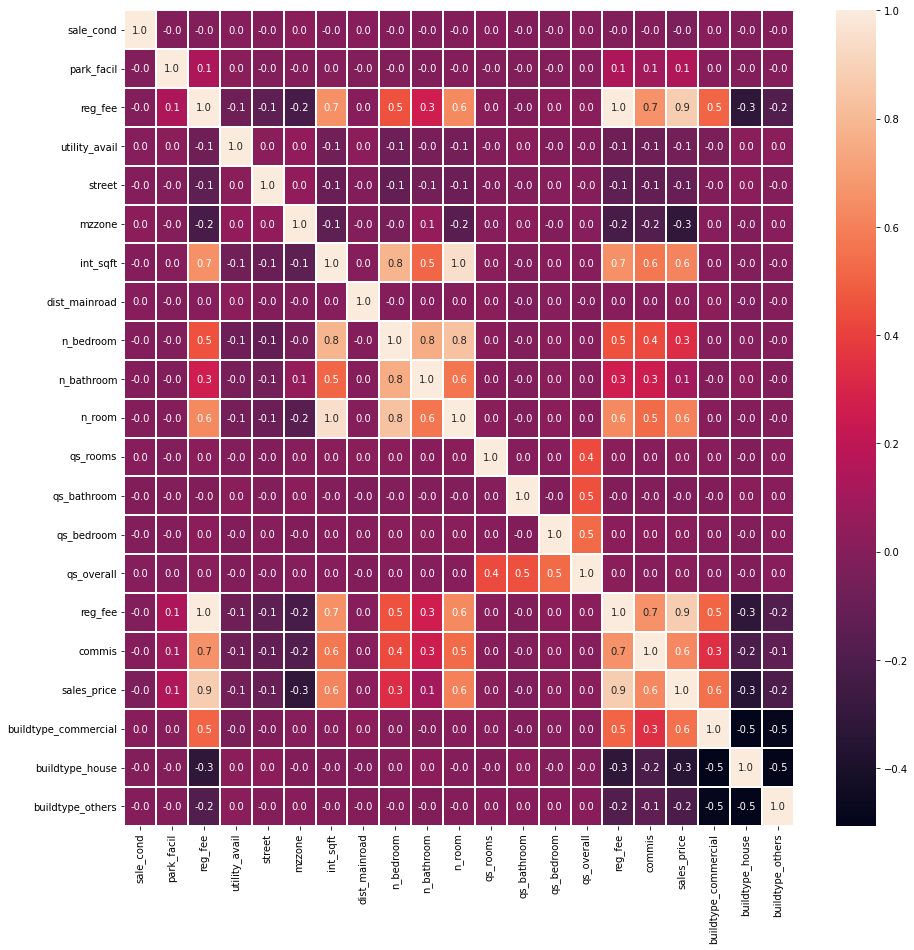

In [131]:
fig = plt.figure(figsize=(15,15))
sb.heatmap(t_1_df.corr(),annot=True,linewidths=1,fmt=".1f")
fig.savefig("heatmapfinallabel_encoded.png")

##Splitting x_train and x_test

###Normalize the data 

In [77]:
t_1_df.date_sale.dtype

dtype('O')

In [78]:
#becoz its changed the datatype of the date columns lets reimport the columns :)
t_1_df.to_csv("after_processed_housing_price.csv",index=0)

In [132]:
t_2_df = pd.read_csv("/content/after_processed_housing_price.csv",parse_dates=["date_sale","date_build"])
t_2_df.head().T

0                    1  \
area                                    2                    5   
sale_cond                               4                    4   
park_facil                              1                    0   
reg_fee                            380000               760122   
date_sale             2011-01-04 00:05:00  2006-01-19 00:12:00   
date_build            1967-01-15 00:05:00  1995-01-22 00:12:00   
utility_avail                           1                    1   
street                                  1                    2   
mzzone                                  5                    2   
int_sqft                             1004                 1986   
dist_mainroad                         131                   26   
n_bedroom                               1                    2   
n_bathroom                              1                    1   
n_room                                  3                    5   
qs_rooms                                4                    4   
qs_bathroom                             3                    4   
qs_bedroom                              4                    2   
qs_overall                              4                    3   
reg_fee.1                          380000               760122   
commis                             144400               304049   
sales_price                       7600000             21717770   
buildtype_commercial                    1                    1   
buildtype_house                         0                    0   
buildtype_others                        0                    0   

                                        2                    3  \
area                                    6                    4   
sale_cond                               4                    5   
park_facil                              1                    0   
reg_fee                            421094               356321   
date_sale             2012-01-04 00:02:00  2010-01-13 00:03:00   
date_build            1992-01-09 00:02:00  1988-01-18 00:03:00   
utility_avail                           4                    3   
street                                  2                    1   
mzzone                                  1                    6   
int_sqft                              909                 1855   
dist_mainroad                          70                   14   
n_bedroom                               1                    3   
n_bathroom                              1                    2   
n_room                                  3                    5   
qs_rooms                                4                    4   
qs_bathroom                             3                    3   
qs_bedroom                              2                    3   
qs_overall                              3                    4   
reg_fee.1                          421094               356321   
commis                              92114                77042   
sales_price                      13159200              9630290   
buildtype_commercial                    1                    0   
buildtype_house                         0                    0   
buildtype_others                        0                    1   

                                        4  
area                                    2  
sale_cond                               4  
park_facil                              1  
reg_fee                            237000  
date_sale             2009-01-05 00:10:00  
date_build            1979-01-13 00:10:00  
utility_avail                           1  
street                                  2  
mzzone                                  4  
int_sqft                             1226  
dist_mainroad                          84  
n_bedroom                               1  
n_bathroom                              1  
n_room                                  3  
qs_rooms                                3  
qs_bathroom                       

In [80]:
t_2_df.date_sale.dtype

dtype('<M8[ns]')

In [81]:
t_2_df.date_sale.dt.year

0       2011
1       2006
2       2012
3       2010
4       2009
        ... 
7051    2011
7052    2004
7053    2006
7054    2009
7055    2005
Name: date_sale, Length: 7056, dtype: int64

In [82]:
#ok before go through the normalizing the data we need to change the datetime into int 
t_2_df["age"] = t_2_df.date_sale.dt.year - t_2_df.date_build.dt.year
t_2_df.head().T

0                    1  \
area                                    2                    5   
sale_cond                               4                    4   
park_facil                              1                    0   
reg_fee                            380000               760122   
date_sale             2011-01-04 00:05:00  2006-01-19 00:12:00   
date_build            1967-01-15 00:05:00  1995-01-22 00:12:00   
utility_avail                           1                    1   
street                                  1                    2   
mzzone                                  5                    2   
int_sqft                             1004                 1986   
dist_mainroad                         131                   26   
n_bedroom                               1                    2   
n_bathroom                              1                    1   
n_room                                  3                    5   
qs_rooms                                4                    4   
qs_bathroom                             3                    4   
qs_bedroom                              4                    2   
qs_overall                              4                    3   
reg_fee.1                          380000               760122   
commis                             144400               304049   
sales_price                       7600000             21717770   
buildtype_commercial                    1                    1   
buildtype_house                         0                    0   
buildtype_others                        0                    0   
age                                    44                   11   

                                        2                    3  \
area                                    6                    4   
sale_cond                               4                    5   
park_facil                              1                    0   
reg_fee                            421094               356321   
date_sale             2012-01-04 00:02:00  2010-01-13 00:03:00   
date_build            1992-01-09 00:02:00  1988-01-18 00:03:00   
utility_avail                           4                    3   
street                                  2                    1   
mzzone                                  1                    6   
int_sqft                              909                 1855   
dist_mainroad                          70                   14   
n_bedroom                               1                    3   
n_bathroom                              1                    2   
n_room                                  3                    5   
qs_rooms                                4                    4   
qs_bathroom                             3                    3   
qs_bedroom                              2                    3   
qs_overall                              3                    4   
reg_fee.1                          421094               356321   
commis                              92114                77042   
sales_price                      13159200              9630290   
buildtype_commercial                    1                    0   
buildtype_house                         0                    0   
buildtype_others                        0                    1   
age                                    20                   22   

                                        4  
area                                    2  
sale_cond                               4  
park_facil                              1  
reg_fee                            237000  
date_sale             2009-01-05 00:10:00  
date_build            1979-01-13 00:10:00  
utility_avail                           1  
street                                  2  
mzzone                                  4  
int_sqft                             1226  
dist_mainroad                          84  
n_bedroom                               1  
n_bathroom                        

###lets Reduce the date_build and date_sale columns

In [83]:
t_2_df = t_2_df.reindex(columns=["area","int_sqft","n_bedroom","n_room","utility_avail","street","commis",
                                 "reg_fee","sale_cond","buildtype_commercial","buildtype_house","buildtype_others","age","sales_price",
                                 "park_facil","mzzone"])
t_2_df.head().T

0         1         2        3        4
area                        2         5         6        4        2
int_sqft                 1004      1986       909     1855     1226
n_bedroom                   1         2         1        3        1
n_room                      3         5         3        5        3
utility_avail               1         1         4        3        1
street                      1         2         2        1        2
commis                 144400    304049     92114    77042    74063
reg_fee                380000    760122    421094   356321   237000
sale_cond                   4         4         4        5        4
buildtype_commercial        1         1         1        0        0
buildtype_house             0         0         0        0        0
buildtype_others            0         0         0        1        1
age                        44        11        20       22       30
sales_price           7600000  21717770  13159200  9630290  7406250
park_facil                  1         0         1        0        1
mzzone                      5         2         1        6        4

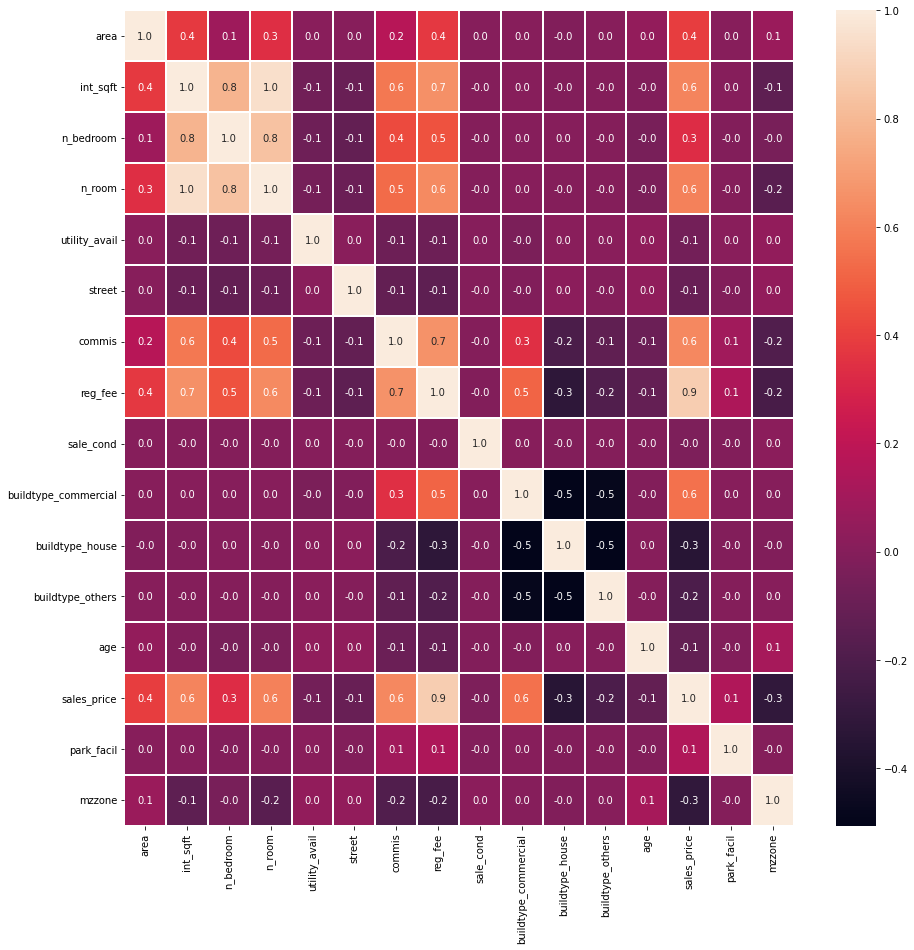

In [84]:
plt.figure(figsize=(15,15))
sb.heatmap(t_2_df.corr(),annot=True,fmt=".1f",linewidth=1)

###Now split our data 

In [85]:
X = t_2_df.drop("sales_price",axis=1)
Y = t_2_df["sales_price"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [87]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
MS = MinMaxScaler()
MS.fit_transform(x_train)
x_train_MS = MS.transform(x_train)
x_test_MS = MS.transform(x_test)

In [88]:
SS = StandardScaler()
SS.fit_transform(x_train)
x_train_SS = SS.transform(x_train)
x_test_SS = SS.transform(x_test)

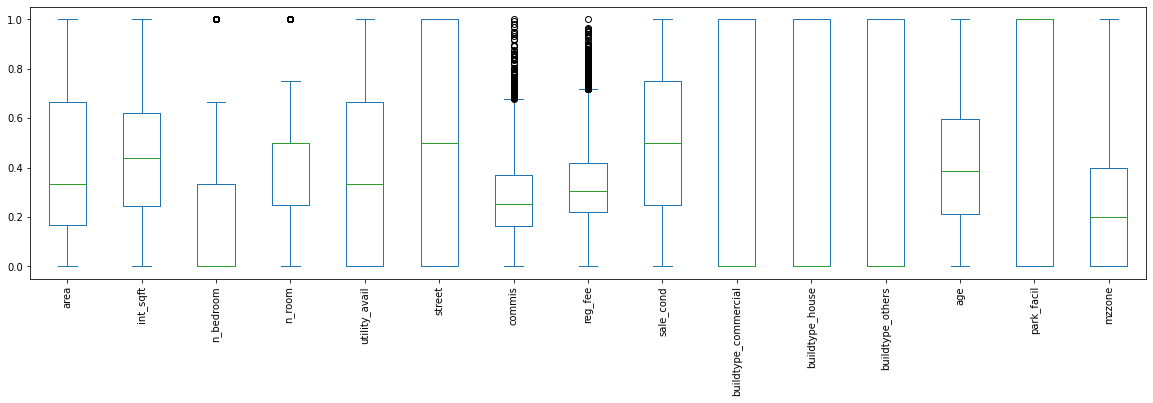

In [89]:
pd.DataFrame(x_train_MS,columns=X.columns).plot.box(figsize=(20,5),rot=90)

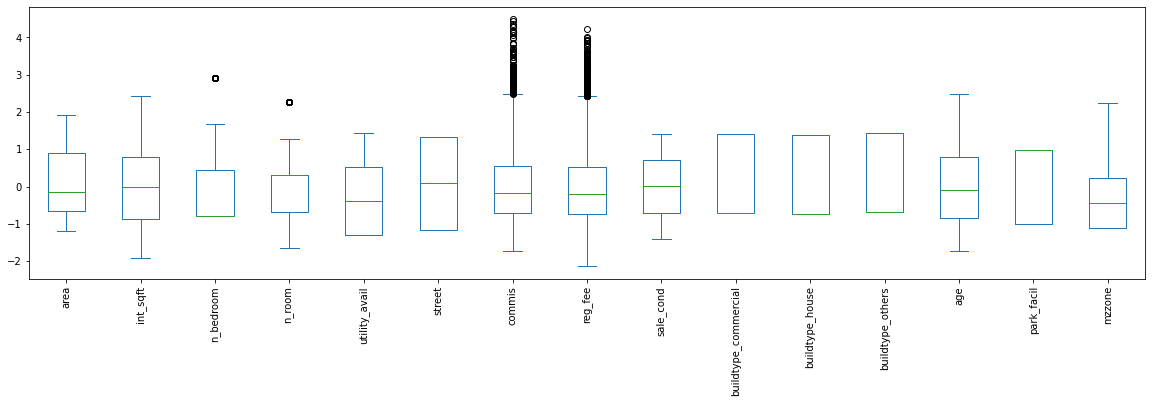

In [90]:
pd.DataFrame(x_train_SS,columns=X.columns).plot.box(figsize=(20,5),rot=90)

##Creating a model :)

In [91]:
x_train.isna().sum()

area                    0
int_sqft                0
n_bedroom               0
n_room                  0
utility_avail           0
street                  0
commis                  0
reg_fee                 0
sale_cond               0
buildtype_commercial    0
buildtype_house         0
buildtype_others        0
age                     0
park_facil              0
mzzone                  0
dtype: int64

In [92]:
x_train.isna()

area  int_sqft  n_bedroom  n_room  utility_avail  street  commis  \
5023  False     False      False   False          False   False   False   
265   False     False      False   False          False   False   False   
40    False     False      False   False          False   False   False   
1608  False     False      False   False          False   False   False   
6599  False     False      False   False          False   False   False   
...     ...       ...        ...     ...            ...     ...     ...   
6276  False     False      False   False          False   False   False   
3678  False     False      False   False          False   False   False   
950   False     False      False   False          False   False   False   
191   False     False      False   False          False   False   False   
5198  False     False      False   False          False   False   False   

      reg_fee  sale_cond  buildtype_commercial  buildtype_house  \
5023    False      False                 False            False   
265     False      False                 False            False   
40      False      False                 False            False   
1608    False      False                 False            False   
6599    False      False                 False            False   
...       ...        ...                   ...              ...   
6276    False      False                 False            False   
3678    False      False                 False            False   
950     False      False                 False            False   
191     False      False                 False            False   
5198    False      False                 False            False   

      buildtype_others    age  park_facil  mzzone  
5023             False  False       False   False  
265              False  False       False   False  
40               False  False       False   False  
1608             False  False       False   False  
6599             False  False       False   False  
...                ...    ...         ...     ...  
6276             False  False       False   False  
3678             False  False       False   False  
950              False  False       False   False  
191              False  False       False   False  
5198             False  False       False   False  

[5644 rows x 15 columns]

In [95]:
from sklearn.ensemble import RandomForestRegressor
m = RandomForestRegressor()
m.fit(x_train,y_train)
m_pred = m.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,m_pred)

0.9763829465078139

In [96]:
x_train_MS.shape

(5644, 15)

In [97]:
x_train=x_train.reset_index

In [98]:
np.all(np.isfinite(x_train_MS))

True

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
model_SS = GradientBoostingRegressor(learning_rate=0.5)
model_SS.fit(x_train_SS,y_train)
model_SS_predict = model_SS.predict(x_test_SS)
from sklearn.metrics import r2_score
SS_score = r2_score(y_test,model_SS_predict)

In [100]:
SS_score

0.9946639995600735

In [101]:
model_MS = GradientBoostingRegressor(learning_rate=0.5)
model_MS.fit(x_train_MS,y_train)
model_MS_predict = model_MS.predict(x_test_MS)
MS_score = r2_score(y_test,model_MS_predict)
MS_score

0.9946634598212615

In [103]:
#the predicted value vs true value 
model_MS_predict[0],y_test

(9016794.800421558, 451      8788500
 7033     4587750
 998      8792100
 2507     5340900
 4074    13941590
           ...   
 1912     7142850
 2640     8403900
 4738    23247590
 4409    13039650
 3413    12030980
 Name: sales_price, Length: 1412, dtype: int64)

In [104]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,model_MS_predict)

206368.78181186487

In [122]:
model_SS.feature_importances_

array([9.07997261e-02, 9.02728657e-02, 4.65841724e-05, 5.21414855e-03,
       5.90634154e-04, 4.20764991e-03, 1.71042997e-03, 6.87823243e-01,
       1.33562585e-03, 7.38196500e-02, 4.38386798e-03, 4.79406897e-05,
       1.58305858e-03, 4.38730341e-03, 3.37772724e-02])

In [123]:
y = model_SS.feature_importances_
y.shape

(15,)

In [124]:
x_test.shape

(1412, 15)

In [125]:
t_2_df.columns.drop("sales_price")

Index(['area', 'int_sqft', 'n_bedroom', 'n_room', 'utility_avail', 'street',
       'commis', 'reg_fee', 'sale_cond', 'buildtype_commercial',
       'buildtype_house', 'buildtype_others', 'age', 'park_facil', 'mzzone'],
      dtype='object')

<BarContainer object of 15 artists>

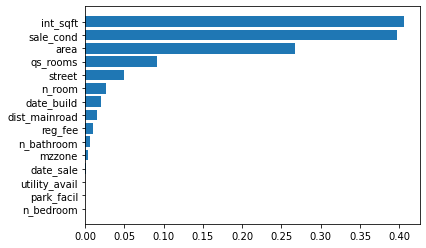

In [133]:
from sklearn.inspection import permutation_importance 
pe_im = permutation_importance(model_SS,x_test_SS,y_test)
index = pe_im.importances_mean.argsort()
plt.barh(t_2_df.columns[index],pe_im.importances_mean[index])

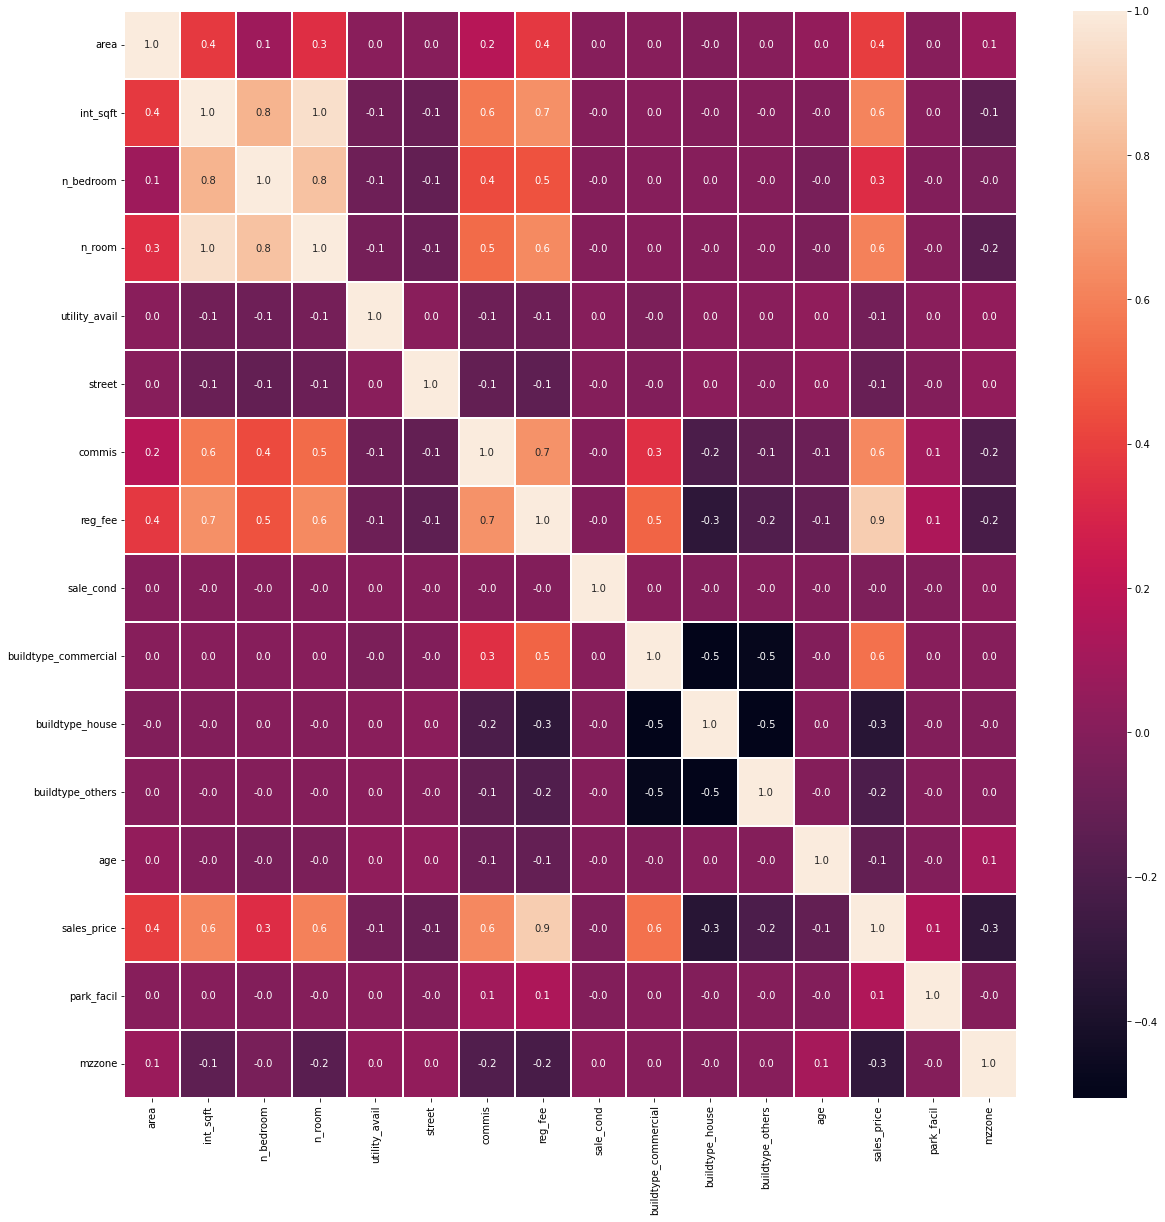

In [128]:
plt.figure(figsize=(20,20))
sb.heatmap(t_2_df.corr(),annot=True,linewidths=1,fmt=".1f")

##Our Original Data

In [129]:
df.head(1).T

0
PRT_ID                      P03210
AREA                    Karapakkam
INT_SQFT                      1004
DATE_SALE      2011-01-04 00:05:00
DIST_MAINROAD                  131
N_BEDROOM                      1.0
N_BATHROOM                     1.0
N_ROOM                           3
SALE_COND                 AbNormal
PARK_FACIL                     Yes
DATE_BUILD     1967-01-15 00:05:00
BUILDTYPE               Commercial
UTILITY_AVAIL               AllPub
STREET                       Paved
MZZONE                           A
QS_ROOMS                       4.0
QS_BATHROOM                    3.9
QS_BEDROOM                     4.9
QS_OVERALL                    4.33
REG_FEE                     380000
COMMIS                      144400
SALES_PRICE                7600000

##After Preprocessed Data

In [130]:
t_2_df.head(1).T

0
area                        2
int_sqft                 1004
n_bedroom                   1
n_room                      3
utility_avail               1
street                      1
commis                 144400
reg_fee                380000
sale_cond                   4
buildtype_commercial        1
buildtype_house             0
buildtype_others            0
age                        44
sales_price           7600000
park_facil                  1
mzzone                      5

#Finished the project within Three Days ;)